# Statistical Inference

## Confidence Interval
Interval such that the true population statistics is contained with a certain level of confidence between an upper bound and a lower bound.

$\{x_1, x_2,...x_n\}$ i.i.d random variables

Sample mean: $\bar{X}=\frac{1}{n}\sum_{i=1}^{n}X_i$

Sample variance: $S^2=\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$

Student's T distribution: $T = \frac{\bar{x}-\mu}{S/\sqrt{n}}$

$P(-c \leq T \leq c) = 1-\alpha$

95% confidence interval: if $\alpha=.05$ then $\int_{-c}^cT = 0.95$

Another interpretation: $P(\bar{X}-\frac{c S}{\sqrt{n}} \leq \mu \leq \bar{X}+\frac{c S}{\sqrt{n}})$

How to determine c? Choose based on the distribution such that $\int_{-c}^cT=1=\alpha$

## An example

In [1]:
from scipy import stats

stats.t.ppf(.975, df=50)

2.0085591097152058

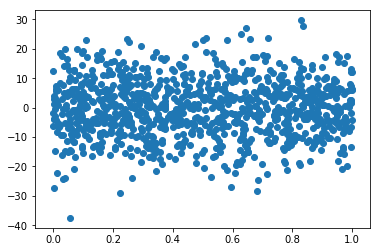

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n = 1000
x = np.sort(stats.uniform.rvs(size=n))
noise = stats.norm.rvs(scale=10, size=n)
y = np.power(x, 2) + noise

plt.scatter(x, y)
# The relationship between x and y is hidden by noise

In [3]:
import pandas as pd
sample_number = 50000

df = pd.DataFrame([np.power(x, 2) + stats.norm.rvs(scale=10, size=n) for i in range(sample_number)],
                   columns=['col'+ str(i) for i in range(n)])

In [4]:
df

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col990,col991,col992,col993,col994,col995,col996,col997,col998,col999
0,5.412594,-13.879010,18.298983,-10.135094,7.868393,-1.529356,-3.540631,9.725221,2.980060,-7.124638,...,3.926267,4.303293,3.684374,13.471272,6.385945,-7.558984,-1.438499,10.873034,-6.209392,4.313234
1,-19.686597,-9.771751,9.138804,20.862102,-2.627858,-0.748435,15.233909,1.796054,0.269510,-1.380295,...,2.134216,6.482134,3.003511,-10.456473,7.940090,4.307899,-3.435937,-5.256855,-5.140722,7.459180
2,-33.010234,-5.464925,5.257231,-4.565542,-18.616251,-1.320773,7.122994,8.549003,7.567237,-11.344136,...,-20.002732,-6.236833,17.934170,17.923528,-16.066844,9.047998,-10.001980,0.049255,5.097528,4.455151
3,5.538556,-3.417458,-2.532988,-8.921537,0.716724,-16.848641,10.518082,12.831787,11.479966,-12.301620,...,-15.620263,-5.969891,-7.070288,-17.004276,-18.487533,21.052174,-9.857468,14.611066,4.700996,13.352541
4,-3.188897,1.898634,-14.790784,13.135929,11.959057,-13.015847,12.187700,12.034290,-13.065107,-8.889456,...,-2.497056,3.653383,1.635453,-10.671182,13.330001,-5.324866,25.330460,10.843269,-5.637720,-3.072232
5,1.911160,13.204555,-22.264834,-10.489555,-10.167184,0.572690,-16.354091,-9.648575,18.829052,10.594124,...,-15.651938,-6.539997,10.506587,7.596261,2.700259,0.047486,-3.516163,13.057765,6.597636,-5.203093
6,-9.494418,-26.452733,0.784768,4.298932,-4.853167,-9.472970,-3.404390,-19.016535,10.408994,4.107219,...,-11.894783,15.551933,9.302002,14.482600,5.845048,-11.946265,-0.242160,-7.474121,8.455322,-4.203997
7,0.676029,0.694997,20.685157,-0.995603,9.377511,-4.181160,-12.990651,-2.617512,22.816764,-0.562762,...,4.549327,-2.180163,-3.777537,12.726540,8.963671,-0.593201,1.642947,-2.626047,-1.844884,11.724044
8,16.370112,-10.356649,20.329692,-1.105823,5.511260,-18.956592,-6.643374,-4.182905,-3.547241,4.183894,...,6.638554,3.280361,-16.975019,-9.442542,6.865580,17.446059,-5.434505,-13.513208,-6.001978,-20.042924
9,1.285986,2.213843,20.373433,6.351820,-5.078394,-3.639573,-22.027244,-4.475272,-1.521054,-7.226495,...,5.284216,-16.415231,-6.840432,-0.857630,10.198122,-12.428086,0.216693,21.679966,-10.462325,15.547575


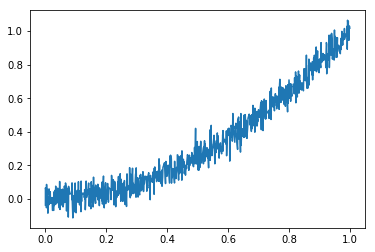

In [5]:
plt.plot(x, df.mean())

In [6]:
stat_df = df.apply(lambda x: pd.Series([np.mean(x), np.std(x)], index=["Mean", "Std"]), axis=0).T
stat_df

,Mean,Std
col0,-0.035972,10.010620
col1,-0.008908,10.001683
col2,0.066571,9.989987
col3,0.056076,10.037575
col4,-0.019856,10.002500
col5,-0.018459,10.008130
col6,-0.051563,9.912067
col7,-0.008787,9.987670
col8,0.086951,9.970382
col9,0.017086,9.958281


In [7]:
c = stats.t.ppf(0.975, df=sample_number-1)
c

1.9600114320426523

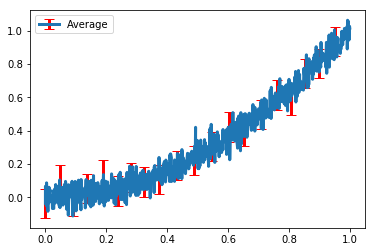

In [8]:
plt.errorbar(x, stat_df["Mean"], yerr=c * stat_df["Std"] / np.sqrt(sample_number),
             lw=3, label="Average", errorevery=50, ecolor="r", capsize=5)
plt.legend()

Computing Pi

In [9]:
N = 10000000
x = stats.uniform.rvs(size=N)
y = stats.uniform.rvs(size=N)
inside_circle = sum(np.power(x,2)+np.power(y,2)<=1)
inside_square = N

pi_4 = inside_circle/inside_square
4*pi_4

3.1416879999999998

In [10]:
True == 1

True

In [11]:
False == 0

True

Bernouilli Distribution

$\hat{\sigma}^{2} = \hat{p}(1-\hat{p})$
for Bernouilli Variable

True probability : $p = \frac{\pi}{4}$
(the hat indicates an estimation)
$\hat{p} = \frac{\hat{\pi}}{4}$

In [12]:
margin = 1.96* np.sqrt(pi_4*(1-pi_4)/N)

4*pi_4 - margin, 4*pi_4, 4*pi_4 + margin

(3.14143355132199, 3.1416879999999998, 3.1419424486780096)

^^^ $3.1410996 \pm c\frac{\hat{\sigma}}{\sqrt{n}} $

Time for a method that doesn't assume anything about the samples

## BootStrap Method for confidence interval

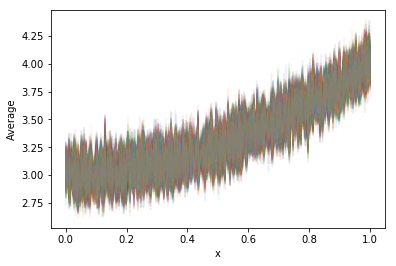

In [13]:
from sklearn.utils import resample

N =1000

x = np.sort(stats.uniform.rvs(size = N))

sample_number = 1000

mat = np.array([np.power(x,2)+stats.chi2.rvs(df=3,size=N) for i in range(sample_number)])

for i in range(500):
    mat_boot = resample(mat,replace=True)
    plt.plot(x,mat_boot.mean(0),alpha=0.1)
plt.xlabel("x")
plt.ylabel("Average")


In [30]:
from sklearn.utils import resample

N =100

x = np.sort(stats.uniform.rvs(size = N))

sample_number = 1000

mat = np.array([np.power(x,2)+stats.chi2.rvs(df=3,size=N) for i in range(sample_number)])

mat_means = [resample(mat).mean(0) for i in range(10000)]

mat_means


[array([ 3.00407918,  2.90442533,  2.96014349,  2.89340593,  3.15087147,
         2.93246177,  2.95311126,  2.94406508,  2.86275882,  3.13487916,
         3.03577486,  2.96941424,  2.99862849,  2.95328162,  3.20369621,
         3.03380721,  2.99946216,  3.22389597,  3.00809063,  3.13897163,
         2.93836734,  3.16323044,  3.11749916,  3.32245189,  3.01007639,
         3.14526832,  2.91105788,  3.06079236,  3.08438519,  3.00477363,
         2.94421799,  3.02295018,  3.11380386,  3.2405226 ,  3.21794891,
         3.03428376,  3.19734236,  3.13356162,  2.83445185,  3.33450376,
         3.2210996 ,  3.09635485,  3.30072813,  2.97878047,  3.36970339,
         3.24395275,  3.14177613,  3.27015106,  3.2271704 ,  3.17254825,
         3.2186139 ,  3.49731016,  3.11875731,  3.21828825,  3.46973301,
         3.42740254,  3.30665049,  3.4036601 ,  3.41759925,  3.55791336,
         3.14858155,  3.38988503,  3.44063653,  3.21025836,  3.38256381,
         3.45759188,  3.48774778,  3.57701735,  3.4

<Container object of 3 artists>

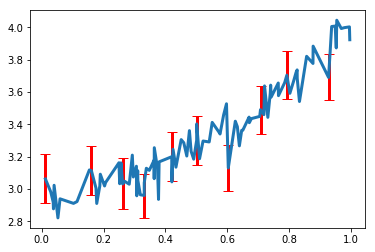

In [32]:
perc25 = np.percentile(mat_means, 2.5, axis=0)
perc975 = np.percentile(mat_means, 97.5, axis=0)

plt.errorbar(x,mat.mean(0), yerr=[mat.mean(0)-perc25,perc975-mat.mean(0)],
            lw=3, errorevery=10, ecolor="r", capsize=5)

# Hypothesis testing

We sample 2 population and we estimate $\hat{\mu_1}$ and $\hat{\mu_2}$
can we conclude $\hat{\mu_1} \neq \hat{\mu_2}$ pr $\hat{\mu_1} = \hat{\mu_2}$?


### Null Hypothesis: 
$H_0: \hat{\mu_1}$ 

### Alternative Hypothesis:

$H_a: \hat{\mu_1} \neq \hat{\mu_1}$ 


More generally:

Null H:

$\hat{\mu_1} - \hat{\mu_2} = d$


$\hat{\mu_1} - \hat{\mu_2} \geq d$


$\hat{\mu_1} - \hat{\mu_2} \leq d$

Alernative H:

$\hat{\mu_1} - \hat{\mu_2} \neq d$


$\hat{\mu_1} - \hat{\mu_2} > d$


$\hat{\mu_1} - \hat{\mu_2} < d$


## Two-Tailed 2 samples t-test

$H_0: \hat{\mu_1} - \hat{\mu_2} <=> (\hat{\mu_1} - \hat{\mu_2} \leq d) \cap (\hat{\mu_1} - \hat{\mu_2} \geq d) $

$H_a: \hat{\mu_1} - \hat{\mu_2} <=> (\hat{\mu_1} - \hat{\mu_2} > d) \cup (\hat{\mu_1} - \hat{\mu_2} < d) $

${x_1,x_2,x_3,...x_n}$ ~  $N (\mu_1,r^2 _1)$

${x_1,x_2,x_3,...x_m}$ ~ $N (\mu_2,r^2 _2)$

$\mu_1 = \frac{1}{n} \sum_{i=1} ^{n} X_i$

$\mu_2 = \frac{1}{m} \sum_{i=1} ^{m} X_i$


$\delta \mu = \mu_1 - \mu_2 --> \hat{\delta \mu} =\hat{\mu_1}\hat{\mu_2}$

$Var[\hat{\delta \mu}] = Var[\hat{\mu_1}] Var[\hat{\mu_2}] = \frac{\sigma_1 ^2}{n} + \frac{\sigma_2 ^2}{m} $

$SE^2 = \frac{S_1 ^2}{n} + \frac{S_2 ^2}{m}$


$T = \frac{\hat{\delta \mu} - d }{SE}$  ~~ t distribution


p-value: waht are the chance to draw $\{x_1,....,x_n\}$ and $\{y_1,....,y_n\}$ get $\hat{\mu_1}$ and $\hat{\mu_2}$ or more extreme results if $H_0$ is true


$p = p_r((t>|T|) \cup (t< -|T|) |H_0 )$

In [40]:
x1 = stats.norm.rvs(size=100,loc=0.5)
x2 = stats.norm.rvs(size=100,loc=0)

stats.ttest_ind(x1,x2)
 #probability that we have extreme values is very small so we can reject a null hypotheis
    #no way that the means are equal based on this test since p is less than 5%

Ttest_indResult(statistic=3.2678700671263075, pvalue=0.0012774490652109874)

In [43]:
x1 = stats.norm.rvs(size=1000,loc=0)
x2 = stats.norm.rvs(size=1000,loc=0.11)
x3 = stats.norm.rvs(size=1000,loc=0)


stats.f_oneway(x1,x2,x3)

F_onewayResult(statistic=12.652311919839926, pvalue=3.3747242451080355e-06)